In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

#import Gkey
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [3]:
Name = []
Lat = []
Lon = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

for city in cities:
    base_url= 'http://api.openweathermap.org/data/2.5/weather?'
    print(f'Finding {city}')
    query_url = f'{base_url}&appid={weather_api_key}&q={city}&units=imperial'
    response = requests.get(query_url)
    city_weather = response.json()
    try:
        Name.append(city_weather['name'])
        Lat.append(city_weather['coord']['lat'])
        Lon.append(city_weather['coord']['lon'])
        Max_Temp.append(city_weather['main']['temp_max'])
        Humidity.append(city_weather['main']['humidity'])
        Cloudiness.append(city_weather['clouds']['all'])
        Wind_Speed.append(city_weather['wind']['speed'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
    except:
        print(f'Cannot find data for {city}')
        pass

Finding sentyabrskiy
Cannot find data for sentyabrskiy
Finding emerald
Finding mayo
Finding punta arenas
Finding saint-pierre
Finding paracuru
Finding tsihombe
Cannot find data for tsihombe
Finding thompson
Finding port alfred
Finding okha
Finding margate
Finding rikitea
Finding clyde river
Finding pangnirtung
Finding fulton
Finding tatawin
Finding albany
Finding ushuaia
Finding bambous virieux
Finding merauke
Finding cape town
Finding palabuhanratu
Cannot find data for palabuhanratu
Finding qaanaaq
Finding daokou
Finding faya
Finding mana
Finding hastings
Finding katsuura
Finding provideniya
Finding hermanus
Finding vaini
Finding saskylakh
Finding bozhou
Finding ruatoria
Cannot find data for ruatoria
Finding bagdarin
Finding nara
Finding vanavara
Finding busselton
Finding longido
Finding ilulissat
Finding san patricio
Finding sao joao da barra
Finding upernavik
Finding sarankhola
Finding puerto ayora
Finding sorvag
Cannot find data for sorvag
Finding salalah
Finding taolanaro
Cannot f

Finding port-de-paix
Cannot find data for port-de-paix
Finding havre-saint-pierre
Finding anchorage
Finding moanda
Finding jyvaskyla
Finding urumqi
Finding lobito
Finding fare
Finding kamenskoye
Cannot find data for kamenskoye
Finding vestmanna
Finding severnoye
Finding ust-kuyga
Finding cabo rojo
Finding nishihara
Finding zhigansk
Finding toftir
Cannot find data for toftir
Finding anloga
Finding westport
Finding dodoma
Finding sangmelima
Finding botwood
Finding port hardy
Finding hofn
Finding roma
Finding moranbah
Finding eureka
Finding resistencia
Finding vilhena
Finding parnamirim
Finding touros
Finding kaufungen
Finding martapura
Finding hailey
Finding tumannyy
Cannot find data for tumannyy
Finding sao joao da talha
Finding biak
Finding horqueta
Finding saint-joseph
Finding torva
Finding barahona
Finding marfino
Finding maloy
Finding havoysund
Finding praxedis guerrero
Finding napier
Finding gao
Finding isilkul
Finding najran
Finding lasa
Finding tautira
Finding sedan
Finding corow

In [4]:
weather_info = {
    'City' : Name,
    'Lat': Lat,
    'Lng': Lon,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country' : Country,
    'Date' : Date
}

weather_df = pd.DataFrame(weather_info)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Emerald,-23.5333,148.1667,71.6,68,8,5.75,AU,1611505750
1,Mayo,38.8876,-76.5119,34.0,55,1,10.36,US,1611505750
2,Punta Arenas,-53.1500,-70.9167,62.6,36,0,14.97,CL,1611505605
3,Saint-Pierre,-21.3393,55.4781,80.6,74,20,5.75,RE,1611505750
4,Paracuru,-3.4100,-39.0306,82.0,71,100,21.99,BR,1611505750


In [5]:
#Convert df to CSV
weather_df.to_csv('cities_index.csv')

In [14]:
#Convert df to CSV
weather_df.to_csv('cities_wo_index.csv', index = False)

In [15]:
#Getting general info of DataFrame
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.705467,19.513915,49.838646,71.587140,56.690355,8.075381,1.611506e+09
std,33.425964,89.138682,35.188095,20.632674,38.280285,5.599040,6.276403e+01
min,-54.800000,-175.200000,-55.500000,4.000000,0.000000,0.220000,1.611505e+09
25%,-6.932750,-56.607300,30.200000,62.500000,20.000000,3.830000,1.611506e+09
50%,24.466700,22.243200,62.330000,77.000000,74.000000,6.910000,1.611506e+09
75%,49.918900,97.116650,78.800000,86.500000,91.500000,10.880000,1.611506e+09
max,78.218600,178.416700,101.890000,100.000000,100.000000,31.070000,1.611506e+09


In [16]:
weather_df[(weather_df["Humidity"] > 100)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


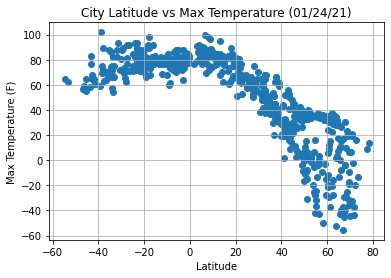

In [71]:
#Latitude vs Temperature Plot
plt.scatter(Lat,Max_Temp)

plt.title("City Latitude vs Max Temperature (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving figure
plt.savefig("../output_data/Fig1.png")

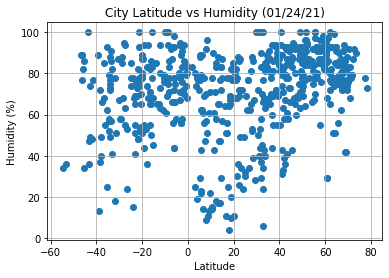

In [72]:
#latitude vs Humidity Plot
plt.scatter(Lat,Humidity)

plt.title("City Latitude vs Humidity (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#saving figure
plt.savefig("../output_data/Fig2.png")

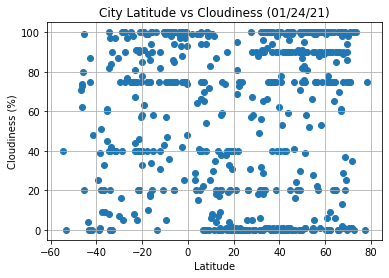

In [73]:
#Latitude vs. Cloudiness Plot
plt.scatter(Lat,Cloudiness)

plt.title("City Latitude vs Cloudiness (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#saving figure
plt.savefig("../output_data/Fig3.png")

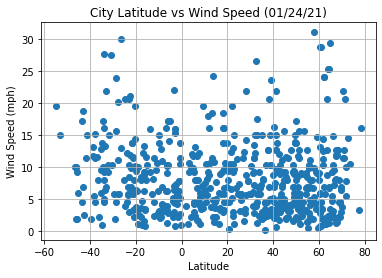

In [74]:
#Latitude vs. Wind Speed Plot
plt.scatter(Lat,Wind_Speed)

plt.title("City Latitude vs Wind Speed (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving figure
plt.savefig("../output_data/Fig4.png")

In [39]:
#Creating variables to filter out Latitude for North and Souther Hemisphere
North_Hem = weather_df.loc[(weather_df["Lat"] >= 0)]
South_Hem = weather_df.loc[(weather_df["Lat"] < 0)]

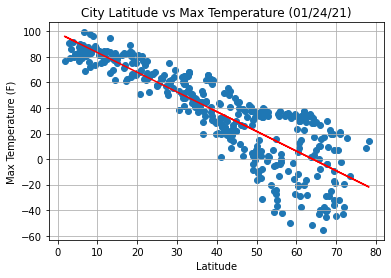

The r Value is 0.7304398583466362


In [42]:
#Max Temp vs. Latitude with Linear Regression NORTH HEMISPHERE

#Define our Variables
N_Lat = North_Hem["Lat"]
N_Temp = North_Hem['Max Temp']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(N_Lat,N_Temp)
MTL_fit = MTL_slope * N_Lat + MTL_int


plt.scatter(N_Lat,N_Temp)
plt.plot(N_Lat, MTL_fit,"-", color = "red")
plt.title("City Latitude vs Max Temperature (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

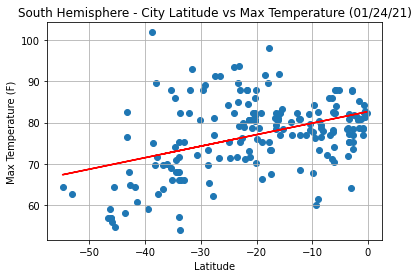

The r Value is 0.17461360197394155


In [44]:
#Max Temp vs. Latitude with Linear Regression SOUTH HEMISPHERE

#Define our Variables
S_Lat = South_Hem["Lat"]
S_Temp = South_Hem['Max Temp']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(S_Lat,S_Temp)
MTL_fit = MTL_slope * S_Lat + MTL_int


plt.scatter(S_Lat,S_Temp)
plt.plot(S_Lat, MTL_fit,"-", color = "red")
plt.title("South Hemisphere - City Latitude vs Max Temperature (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

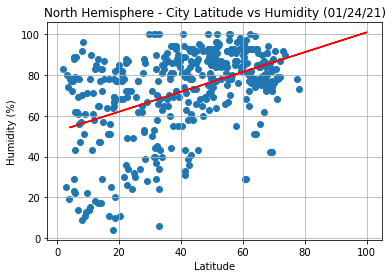

The r Value is 0.19444582194029722


In [50]:
#Humidity vs. Latitude with Linear Regression NORTH HEMISPHERE

#Define our Variables
N_Lat = North_Hem["Lat"]
N_HUM = North_Hem['Humidity']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(N_Lat,N_HUM)
MTL_fit = MTL_slope * N_HUM + MTL_int


plt.scatter(N_Lat,N_HUM)
plt.plot(N_HUM, MTL_fit,"-", color = "red")
plt.title("North Hemisphere - City Latitude vs Humidity (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

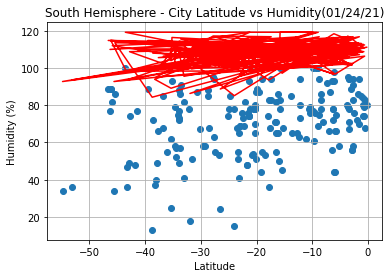

The r Value is 0.08853742456350303


In [57]:
#Humidity vs. Latitude with Linear Regression SOUTH HEMISPHERE

#Define our Variables
S_Lat = South_Hem["Lat"]
S_HUM = South_Hem['Humidity']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(S_Lat,S_HUM)
MTL_fit = MTL_slope * S_HUM + MTL_int


plt.scatter(S_Lat,S_HUM)
plt.plot(S_Lat, MTL_fit,"-", color = "red")
plt.title("South Hemisphere - City Latitude vs Humidity(01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

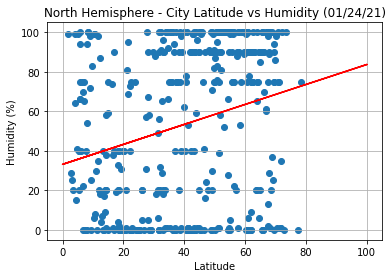

The r Value is 0.06250123960431553


In [59]:
#Cloudiness vs. Latitude with Linear Regression NORTH HEMISPHERE

#Define our Variables
N_Lat = North_Hem["Lat"]
N_Cld = North_Hem['Cloudiness']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(N_Lat,N_Cld)
MTL_fit = MTL_slope * N_Cld + MTL_int


plt.scatter(N_Lat,N_Cld)
plt.plot(N_Cld, MTL_fit,"-", color = "red")
plt.title("North Hemisphere - City Latitude vs Humidity (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

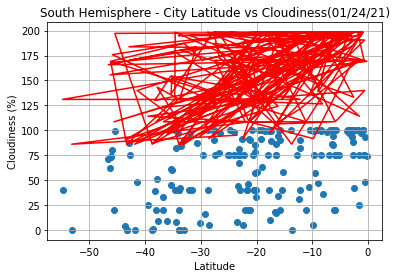

The r Value is 0.1967374825849519


In [68]:
#Cloudiness vs. Latitude with Linear Regression SOUTH HEMISPHERE

#Define our Variables
S_Lat = South_Hem["Lat"]
S_Cld = South_Hem['Cloudiness']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(S_Lat,S_Cld)
MTL_fit = MTL_slope * S_Cld + MTL_int


plt.scatter(S_Lat,S_Cld)
plt.plot(S_Lat,MTL_fit,"-", color = "red")
plt.title("South Hemisphere - City Latitude vs Cloudiness(01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

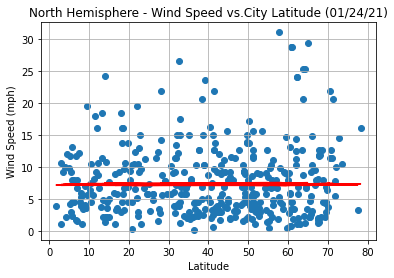

The r Value is 0.002836784456446319


In [67]:
#Wind Speed (mph) vs. Latitude with Linear Regression NORTH HEMISPHERE

#Define our Variables
N_Lat = North_Hem["Lat"]
N_Ws = North_Hem['Wind Speed']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(N_Lat,N_Ws)
MTL_fit = MTL_slope * N_Ws + MTL_int


plt.scatter(N_Lat,N_Ws)
plt.plot(N_Lat, MTL_fit,"-", color = "red")
plt.title("North Hemisphere - Wind Speed vs.City Latitude (01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')

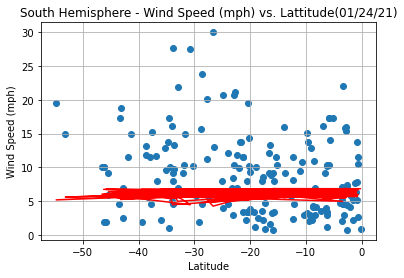

The r Value is 0.04238756110662181


In [69]:
#Wind Speed vs. Latitude with Linear Regression SOUTH HEMISPHERE

#Define our Variables
S_Lat = South_Hem["Lat"]
S_Ws = South_Hem['Wind Speed']

#Linear Regression Equation

MTL_slope, MTL_int, MTL_r,MTL_p,MTL_std_err = stats.linregress(S_Lat,S_Ws)
MTL_fit = MTL_slope * S_Ws + MTL_int


plt.scatter(S_Lat,S_Ws)
plt.plot(S_Lat,MTL_fit,"-", color = "red")
plt.title("South Hemisphere - Wind Speed (mph) vs. Lattitude(01/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

print(f'The r Value is {MTL_r**2}')